# Heart Disease Prediction Project
## Import required libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from ucimlrepo import fetch_ucirepo


In [104]:
# Step 3: Fetch the Heart Disease dataset (ID: 45)
heart_disease = fetch_ucirepo(id=45)


In [105]:
# Step 4: Load features (X) and target (y)
X = heart_disease.data.features
y = heart_disease.data.targets

In [108]:
# Step 5: Explore metadata and variables
print("=== Metadata ===")
print(heart_disease.metadata)

=== Metadata ===
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi,

In [110]:
print("=== Variables Info ===")
print(heart_disease.variables)

=== Variables Info ===
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None          

# Main Project Start 




# Step 1: Data Acquisition & EDA

## 1.1: Import Dataset from UCI Repository

In [112]:
# Install (if not already)
# pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch Heart Disease dataset (ID = 45)
heart_disease = fetch_ucirepo(id=45)

# Load data
X = heart_disease.data.features
y = heart_disease.data.targets


## 1.2: Merge Features and Target for EDA

In [113]:
import pandas as pd

# Merge features and target
df = pd.concat([X, y], axis=1)


## 1.3: Basic Exploration

In [117]:
# Shape and column types
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Preview the data
print("\nHead:\n", df.head())

# Summary statistics
print("\nDescribe:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Shape: (303, 14)

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Head:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Describe:
               age         sex          cp    tre

## 1.4: Correlation Matrix

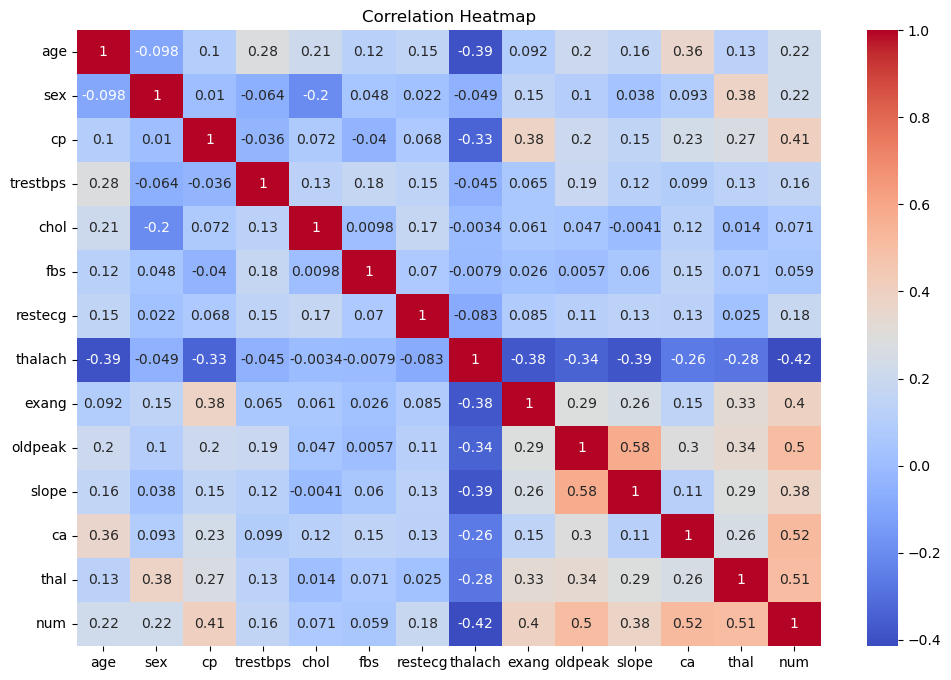

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 1.5: Distribution of Target

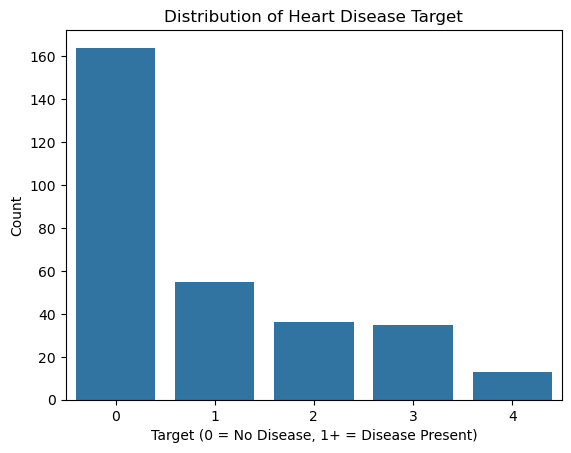

In [129]:
sns.countplot(data=df, x='num')
plt.title("Distribution of Heart Disease Target")
plt.xlabel("Target (0 = No Disease, 1+ = Disease Present)")
plt.ylabel("Count")
plt.show()


## 1.6: Boxplots to Detect Outliers

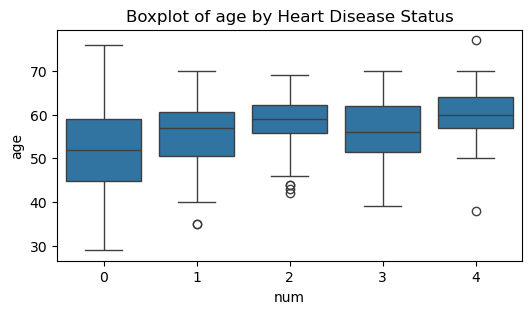

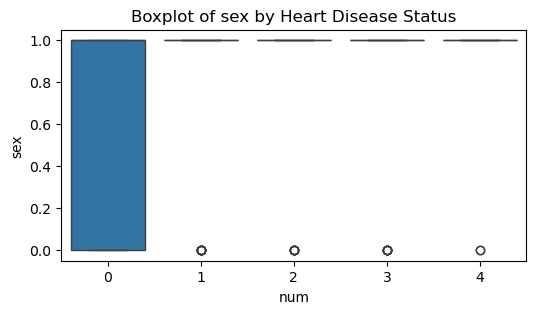

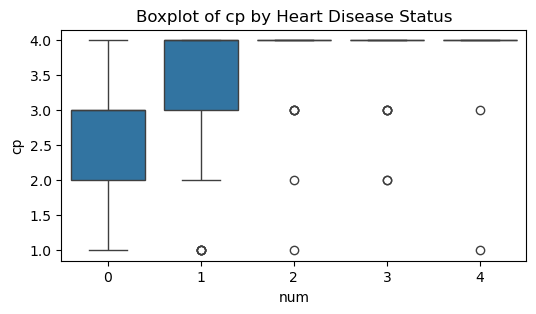

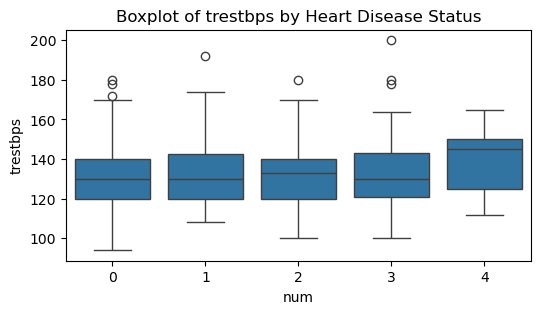

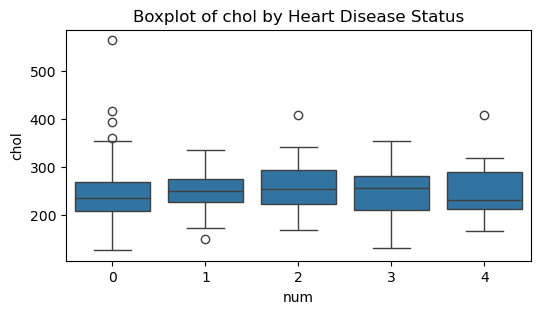

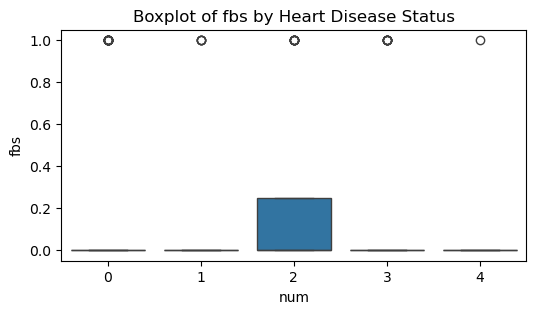

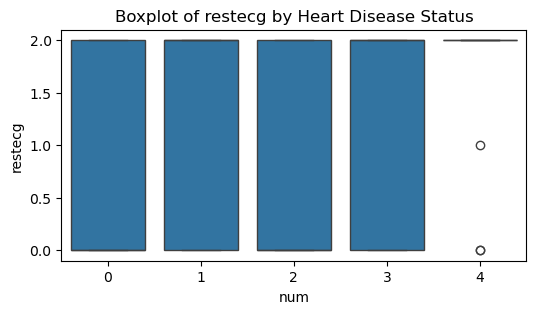

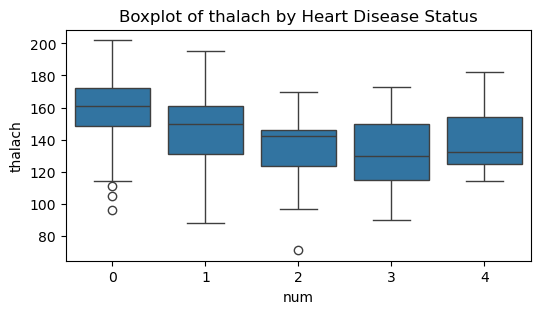

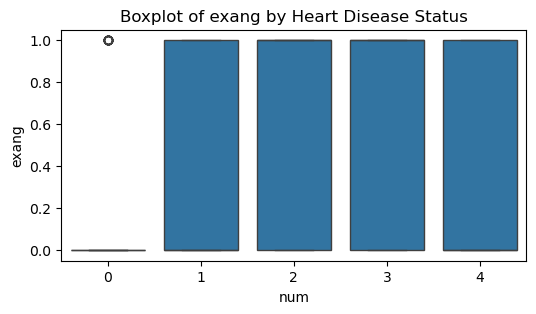

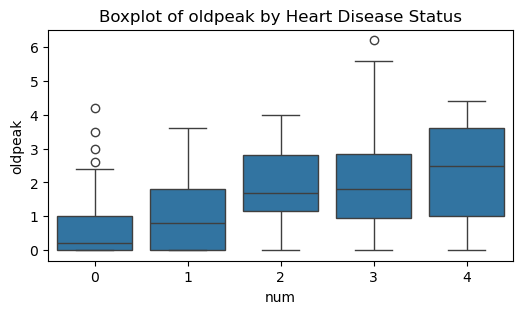

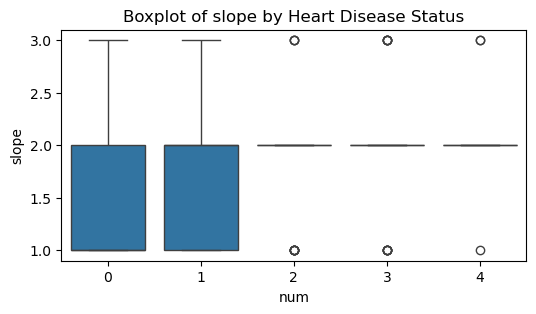

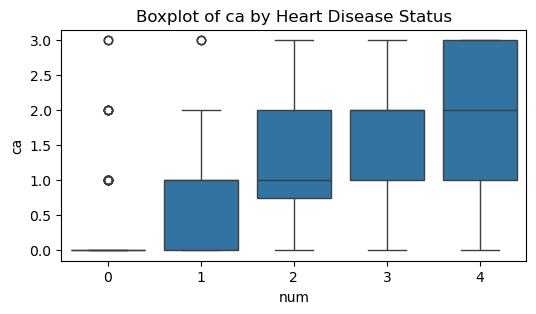

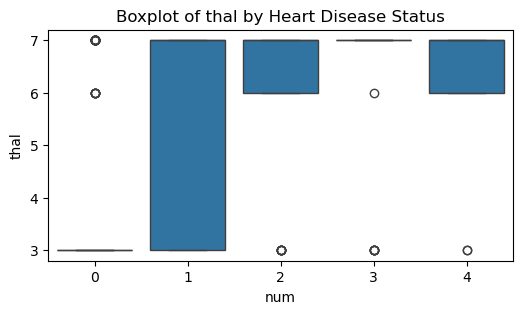

In [135]:
features_to_plot = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 
                    'slope', 'ca', 'thal']  # Removed 'num'

for feature in features_to_plot:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='num', y=feature)
    plt.title(f"Boxplot of {feature} by Heart Disease Status")
    plt.show()


# Step 2: Data Preprocessing

## 2.1: Convert Target to Binary

In [139]:
# Convert target 'num' to binary (0 = no disease, 1 = disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


##  2.2: Handle Missing Values

In [142]:
# Check for missing values
print(df.isnull().sum())

# If any are found, you can fill or drop them
# Example: Fill numeric missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


## 2.3: Encode Categorical Variables

In [157]:
# Correct list of categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display first 5 rows of the encoded dataframe
print(df_encoded.head())


   age  trestbps  chol  thalach  oldpeak  num  sex_1   cp_2   cp_3   cp_4  \
0   63       145   233      150      2.3    0   True  False  False  False   
1   67       160   286      108      1.5    1   True  False  False   True   
2   67       120   229      129      2.6    1   True  False  False   True   
3   37       130   250      187      3.5    0   True  False   True  False   
4   41       130   204      172      1.4    0  False   True  False  False   

   ...  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1.0  ca_2.0  \
0  ...      False       True    False    False     True   False   False   
1  ...      False       True     True     True    False   False   False   
2  ...      False       True     True     True    False   False    True   
3  ...      False      False    False    False     True   False   False   
4  ...      False       True    False    False    False   False   False   

   ca_3.0  thal_6.0  thal_7.0  
0   False      True     False  
1    True     False   

## 2.4: Scale Numerical Features

In [159]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled_array = scaler.fit_transform(X)

# Convert back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Optional: preview
print(X_scaled.head())


        age  trestbps      chol   thalach   oldpeak     sex_1      cp_2  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338  0.686202 -0.444554   
1  1.392002  1.611220  0.760415 -1.821905  0.397182  0.686202 -0.444554   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147  0.686202 -0.444554   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573  0.686202 -0.444554   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912 -1.457296  2.249444   

       cp_3      cp_4     fbs_1  restecg_1  restecg_2   exang_1   slope_2  \
0 -0.629534 -0.951662  2.394438  -0.115663   1.023375 -0.696631 -0.926766   
1 -0.629534  1.050793 -0.417635  -0.115663   1.023375  1.435481  1.079021   
2 -0.629534  1.050793 -0.417635  -0.115663   1.023375  1.435481  1.079021   
3  1.588476 -0.951662 -0.417635  -0.115663  -0.977158 -0.696631 -0.926766   
4 -0.629534 -0.951662 -0.417635  -0.115663   1.023375 -0.696631 -0.926766   

    slope_3    ca_1.0    ca_2.0    ca_3.0  thal_6.0  thal_7.0  
0  3.664502 -0.522599 

##  2.5: Split the Dataset

In [161]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (242, 20)
X_test shape: (61, 20)
y_train shape: (242,)
y_test shape: (61,)


# Step 3: Model Development and Training

## 3.1 Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the model
log_reg.fit(X_train, y_train)

# Step 3: Make predictions on test data
y_pred_logreg = log_reg.predict(X_test)

# Optional: Predict probabilities (for ROC/AUC later)
y_prob_logreg = log_reg.predict_proba(X_test)[:, 1]

# Step 4: Preview results
print("Predictions:", y_pred_logreg[:10])


Predictions: [0 1 0 0 0 0 0 0 1 0]


## 3.2 K-Nearest Neighbors (KNN) with Cross-Validation

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the range of K to search
param_grid_knn = {'n_neighbors': list(range(1, 21))}

# Step 2: Initialize KNN model
knn = KNeighborsClassifier()

# Step 3: Perform Grid Search with 5-fold cross-validation
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

# Step 4: Get the best model and print best K
best_knn = grid_knn.best_estimator_
print("Best K value:", grid_knn.best_params_['n_neighbors'])

# Step 5: Predict on test data
y_pred_knn = best_knn.predict(X_test)

# Optional: Probability prediction for ROC curve
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

# Step 6: Preview predictions
print("Predictions:", y_pred_knn[:10])


Best K value: 19
Predictions: [0 0 0 0 0 0 0 0 1 0]


## 3.3 Decision Tree with Hyperparameter Tuning

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6, 10],
    'criterion': ['gini', 'entropy']
}

# Step 2: Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Step 3: Use GridSearchCV to find best parameters (5-fold CV)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

# Step 4: Get the best model
best_dt = grid_dt.best_estimator_
print("Best Parameters:", grid_dt.best_params_)

# Step 5: Make predictions
y_pred_dt = best_dt.predict(X_test)

# Optional: Predict probabilities (for ROC curve later)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Step 6: Preview predictions
print("Predictions:", y_pred_dt[:10])


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Predictions: [1 1 0 0 0 1 1 1 1 0]


#  Step 4: Model Evaluation

## 4.1 Import Required Libraries

In [186]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt


## 4.2 Define a Helper Function to Print Evaluation Metrics

In [189]:
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n📊 Evaluation for {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


## 4.3 Evaluate Each Model

### ▶️ Logistic Regression

In [193]:
evaluate_model("Logistic Regression", y_test, y_pred_logreg, y_prob_logreg)



📊 Evaluation for Logistic Regression
Accuracy : 0.8688524590163934
Precision: 0.8333333333333334
Recall   : 0.8928571428571429
F1 Score : 0.8620689655172413
ROC AUC  : 0.9567099567099568

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### ▶️ K-Nearest Neighbors

In [196]:
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn, y_prob_knn)



📊 Evaluation for K-Nearest Neighbors
Accuracy : 0.9180327868852459
Precision: 0.9259259259259259
Recall   : 0.8928571428571429
F1 Score : 0.9090909090909091
ROC AUC  : 0.9659090909090909

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.93      0.89      0.91        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### ▶️ Decision Tree

In [199]:
evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)



📊 Evaluation for Decision Tree
Accuracy : 0.6721311475409836
Precision: 0.6333333333333333
Recall   : 0.6785714285714286
F1 Score : 0.6551724137931034
ROC AUC  : 0.6726190476190478

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        33
           1       0.63      0.68      0.66        28

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



##  4.4 Plot Confusion Matrices

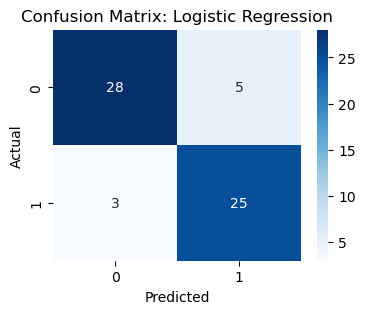

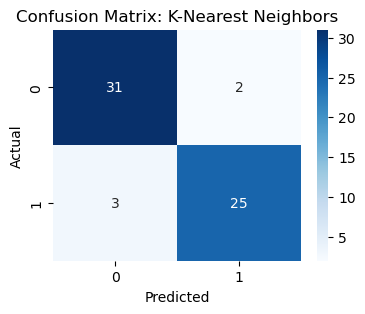

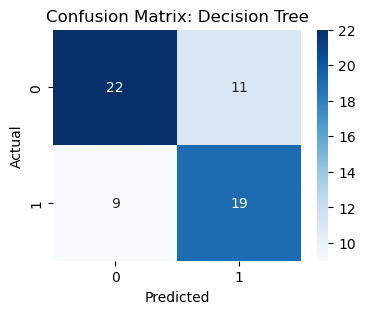

In [202]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")


## 4.5 Plot ROC Curves (All Models Together)

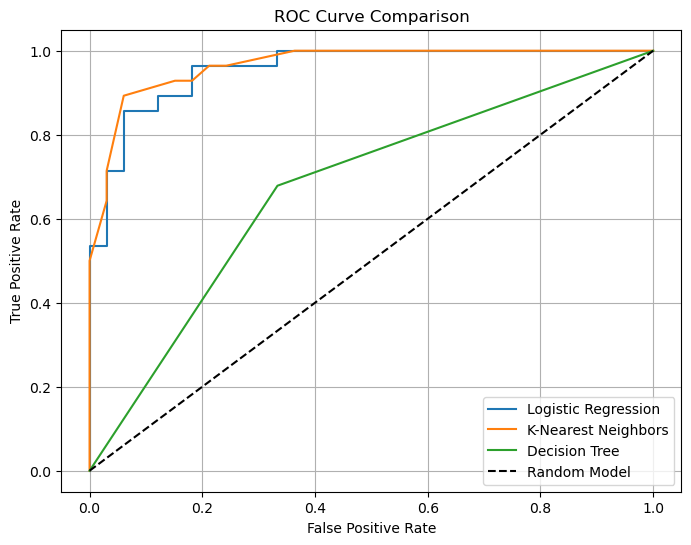

In [205]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_knn, tpr_knn, label="K-Nearest Neighbors")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Finding Best Model
## Tabulate Model Metrics

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the results dictionary
results = {
    "Model": ["Logistic Regression", "KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob_logreg),
        roc_auc_score(y_test, y_prob_knn),
        roc_auc_score(y_test, y_prob_dt)
    ]
}

# Convert to DataFrame and round values
comparison_df = pd.DataFrame(results)
comparison_df[["Accuracy", "F1 Score", "ROC AUC"]] = comparison_df[["Accuracy", "F1 Score", "ROC AUC"]].round(3)

# Display table
print("\n🔍 Model Comparison Table:\n")
print(comparison_df)



🔍 Model Comparison Table:

                 Model  Accuracy  F1 Score  ROC AUC
0  Logistic Regression     0.869     0.862    0.957
1                  KNN     0.918     0.909    0.966
2        Decision Tree     0.672     0.655    0.673


## Visualize the Comparison

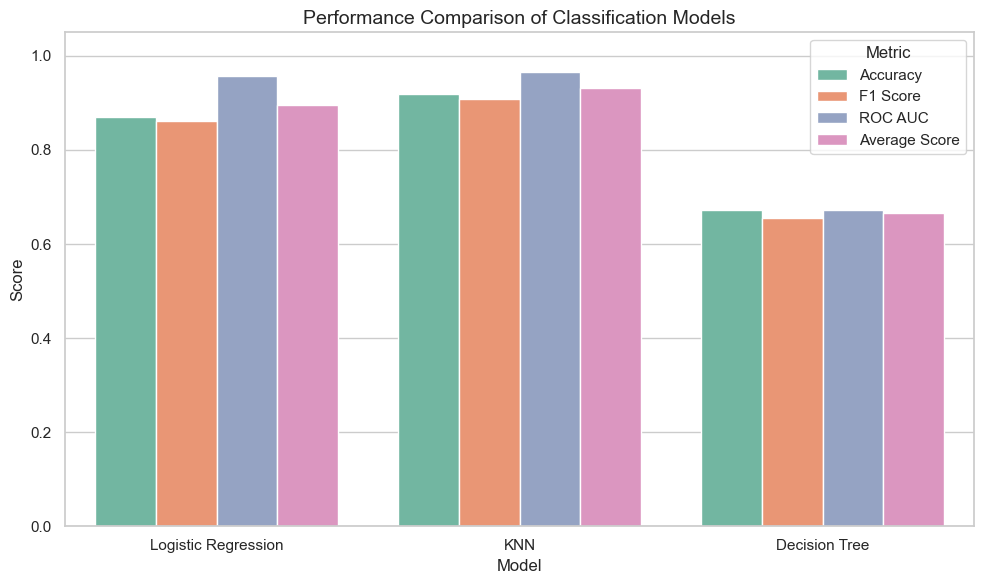

In [237]:
# Set seaborn style
sns.set(style="whitegrid")

# Melt the dataframe for visualization
melted_df = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Performance Comparison of Classification Models", fontsize=14)
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Find and Show the Best Model

In [224]:
# Calculate average score for each model
comparison_df["Average Score"] = comparison_df[["Accuracy", "F1 Score", "ROC AUC"]].mean(axis=1)

# Find the best model
best_model = comparison_df.loc[comparison_df["Average Score"].idxmax(), "Model"]

# Display result
print(f"\n🏆 Based on Accuracy, F1-Score, and ROC-AUC, the BEST model is: {best_model}")



🏆 Based on Accuracy, F1-Score, and ROC-AUC, the BEST model is: KNN


# Step 5: Model Interpretation and Feature Importance

##  5.1 Feature Importance from Logistic Regression

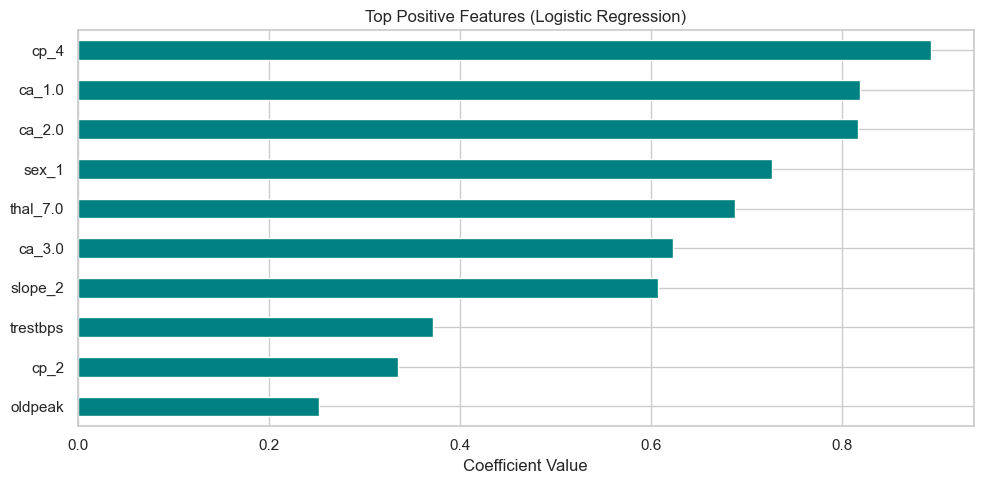

In [231]:
import numpy as np

# Get feature names
feature_names = X.columns

# Get coefficients and pair with feature names
coefficients = pd.Series(log_reg.coef_[0], index=feature_names)

# Plot top 10 important features
plt.figure(figsize=(10, 5))
coefficients.sort_values(ascending=False).head(10).plot(kind='barh', color='teal')
plt.title("Top Positive Features (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


## 5.2 Feature Importance from Decision Tree

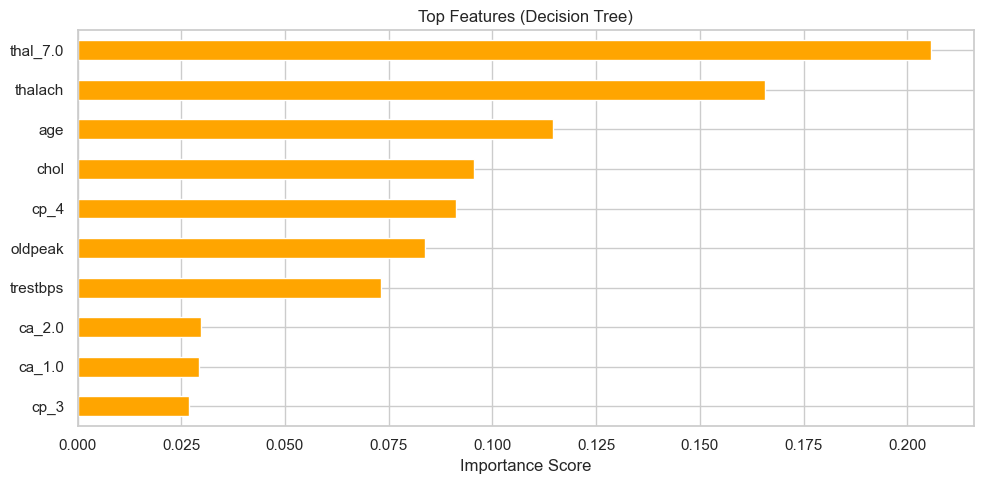

In [235]:
# Get feature importances
importances = pd.Series(best_dt.feature_importances_, index=feature_names)

# Plot top 10 important features
plt.figure(figsize=(10, 5))
importances.sort_values(ascending=False).head(10).plot(kind='barh', color='orange')
plt.title("Top Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


## 5.3 Interpretability Discussion

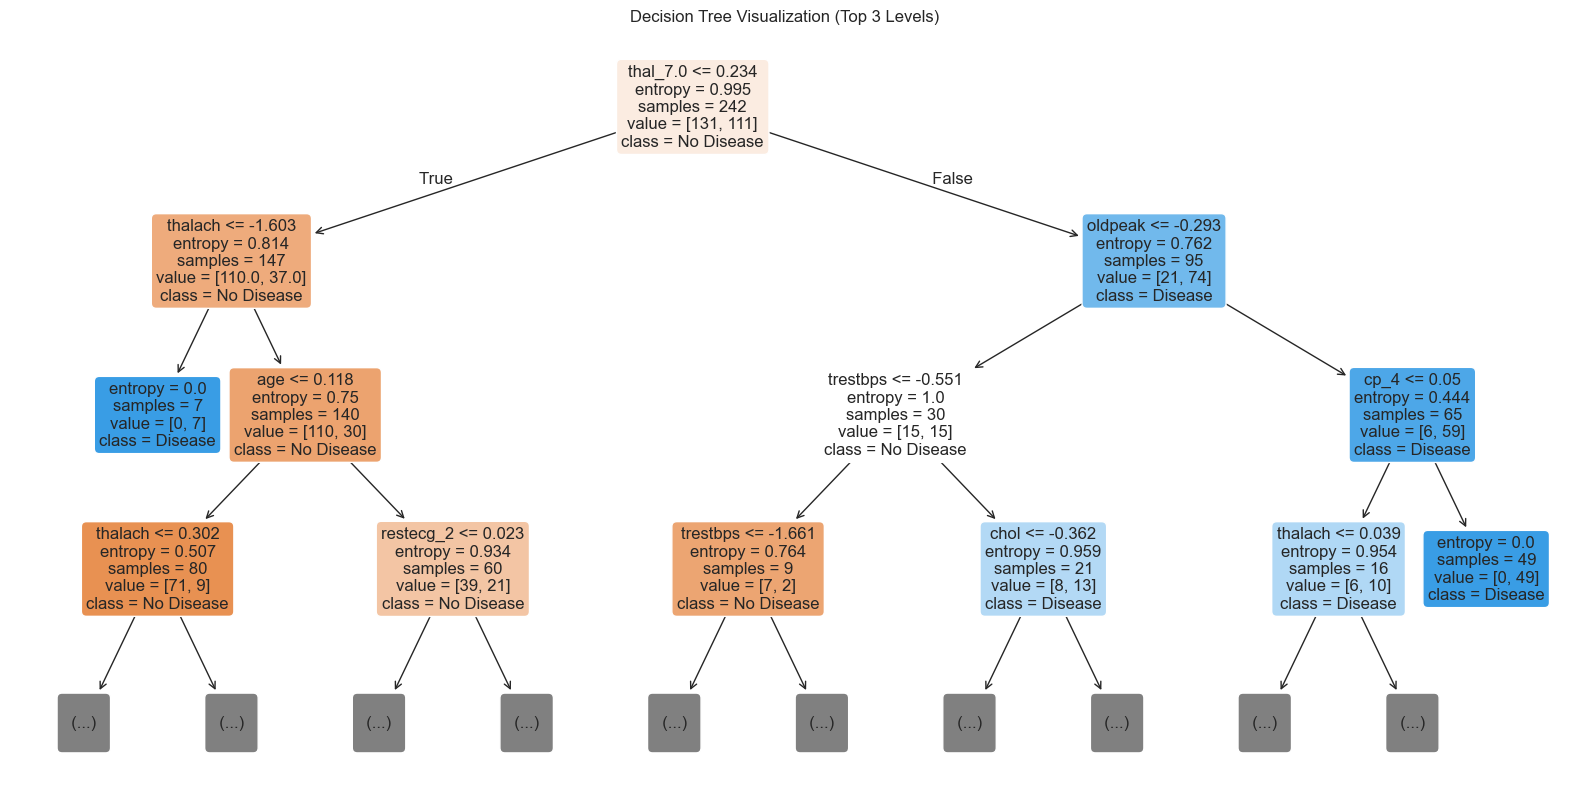

In [254]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=12,
    max_depth=3  # Visualize only first 3 levels for simplicity
)

plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()
